#Author: Md Mintu Miah, PhD; Post Doctoral Researcher at PATH, UC Berkeley
#Project: Contract 65A0911: Complete Cities: Bicycle Network Connectivity Evaluation Methodology
#PI: Alex Skabardonis, PhD, Professor, UC Berkeley

In [1]:
#!pip install pybna # if you need to install please remove comment out

In [1]:
# if you need to install please remove comment out
#!pip install -r requirements.txt
#!pip install SQLAlchemy
#!pip install momepy

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections.abc import Mapping
from distutils.version import LooseVersion
from pybna import Importer
import geopandas as gpd
import pybna

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\conf.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io

In [4]:

from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import Point
from functools import reduce
#import matplotlib.pyplot as plt  ## not needed
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import csv
from time import time
import time
from geopandas import GeoSeries, GeoDataFrame

In [5]:
#conda install arcpy=3.0 -c esri

In [5]:
#import arcpy
#from arcpy import env

In [5]:
%%time
# Import Configuration file
i = pybna.Importer(config="config.yaml")
# Import Study Area boundary shape file
i.import_boundary('geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp', overwrite=True)
# Mention the State fips, for California it is 6
i.import_census_blocks(fips=6, overwrite=True)
i.import_census_jobs("received.neighborhood_census_block_jobs",state="CA", overwrite=True)

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\importer.py:58: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  self.config = self.parse_config(yaml.safe_load(open(config)))


Connecting to database
Copying boundary to database
Loading boundary


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Loading data from http://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_06_pophu.zip
Filtering blocks to boundary
Filtering out water
Copying blocks to database
Loading data for state CA
No data for state CA for year 2020. Checking previous year.


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\importer.py:351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs = jobs_main.append(jobs_aux,ignore_index=True)


Copying jobs to database
CPU times: total: 3min 7s
Wall time: 13min 19s


In [6]:
%%time
i.import_osm_network(overwrite=True)

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


Copying OSM ways to database
Copying OSM intersections to database
Processing OSM data in database
CPU times: total: 36min 37s
Wall time: 42min 35s


In [9]:
%%time
#Increase the timeout in your importer file if your computer is weak to avoid error
#i.import_osm_destinations(overwrite=True)


CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
%%time
# stress
s = pybna.Stress(config='config.yaml')
s.segment_stress()
s.crossing_stress()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\stress.py:46: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  self.config = self.parse_config(yaml.safe_load(open(config)))


Connecting to database
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
  ....forward
  ....backward
CPU times: total: 516 ms
Wall time: 5min 10s


In [43]:
#%%time
# connectivity
#bna = pybna.pyBNA(config='config.yaml')
#bna.calculate_connectivity()

In [44]:
#%%time
# scores
#bna.score("myschema.my_scores_table")
#bna.aggregate("myschema.my_aggregate_score_table")

In [5]:
# Read the LTS shape file
lts=gpd.read_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/neighborhood_ways.shp")
lts = lts.rename(columns={'OSMID':'osmid'})
lts=lts.rename({'INTERSECTI':'u', 'INTERSE_01':'v'}, axis='columns')
lts['length']=lts.length
lts.head()

ROAD_ID        osmid   FUNCTIONAL PATH_ID ONE_WAY       u       v  WIDTH  \
0   111276   {31439803}     tertiary    None      ft  419038  419030    NaN   
1   162454   {93291777}     tertiary    None      ft  364379  364375    NaN   
2   165633  {184388728}      primary    None      ft  329656  329657    NaN   
3   888344   {53726448}     tertiary    None      ft   76716   76717    NaN   
4   923150  {655711604}  residential    None      ft  129104  129102    NaN   

   SPEED_LIMI FT_BIKE_IN  ...  TWLTL_CROS FT_PARK  TF_PARK  FT_SEG_STR  \
0         NaN       None  ...        None       ?        ?         4.0   
1         NaN       None  ...        None       ?        ?         4.0   
2        35.0       None  ...        None       ?        ?         4.0   
3         NaN       None  ...        None       ?        ?         4.0   
4         NaN       None  ...        None       ?        ?         1.0   

   FT_INT_STR TF_SEG_STR TF_INT_STR XWALK  \
0         NaN        NaN        3.0  None   
1         1.0        NaN        1.0  None   
2         1.0        NaN        1.0  None   
3         1.0        NaN        1.0  None   
4         NaN        NaN        NaN  None   

                                            geometry     length  
0  LINESTRING (91536.677 -976.326, 91560.948 -973...  24.398252  
1  LINESTRING (108350.827 -24102.437, 108425.349 ...  75.902661  
2  LINESTRING (94730.324 -23220.754, 94768.157 -2...  37.835842  
3  LINESTRING (65934.473 27367.107, 65935.819 273...   1.539394  
4  LINESTRING (41921.847 57781.540, 41918.170 577...   3.697954  

[5 rows x 27 columns]

# Lets calculate the slope for each link

In [6]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

EPSG:4269


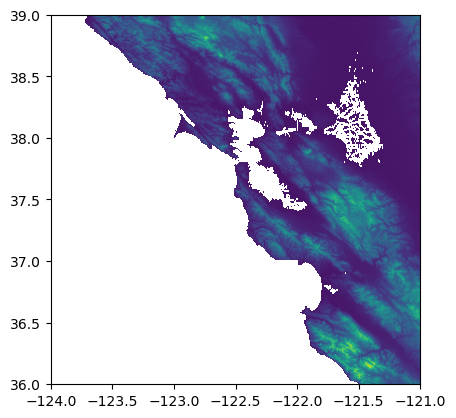

<AxesSubplot:>

In [7]:
# Open the raster image
barea_slope = rasterio.open('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Slope/Slope/cslope11.img')
print(barea_slope.crs)
rioplot.show(barea_slope)

In [8]:
# only band is elev value (in m)
band1 = barea_slope.read(1, masked=True)  # mask noData cells [shouldn't be necessary on land]
stats = {'min': band1.min(), 'mean': band1.mean(), 'max': band1.max()}
print(stats)

{'min': -104, 'mean': -3.891794414661842, 'max': 1784}


In [9]:
# Reproject the geometries by replacing the values with projected ones
lts_new = lts.to_crs(epsg=4326)
lts_new.head(10)

ROAD_ID        osmid   FUNCTIONAL PATH_ID ONE_WAY       u       v  WIDTH  \
0   111276   {31439803}     tertiary    None      ft  419038  419030    NaN   
1   162454   {93291777}     tertiary    None      ft  364379  364375    NaN   
2   165633  {184388728}      primary    None      ft  329656  329657    NaN   
3   888344   {53726448}     tertiary    None      ft   76716   76717    NaN   
4   923150  {655711604}  residential    None      ft  129104  129102    NaN   
5   955824  {502817925}     tertiary    None      ft  124992  124987    NaN   
6   463165  {758004215}  residential    None      ft   72994   72996    NaN   
7   513383  {792316869}    secondary    None      ft  164789  165035    NaN   
8    67412  {393791123}     tertiary    None      ft  295993  295988    NaN   
9   180018  {417891815}      primary    None      ft  325209  325205    NaN   

   SPEED_LIMI FT_BIKE_IN  ...  TWLTL_CROS FT_PARK  TF_PARK  FT_SEG_STR  \
0         NaN       None  ...        None       ?        ?         4.0   
1         NaN       None  ...        None       ?        ?         4.0   
2        35.0       None  ...        None       ?        ?         4.0   
3         NaN       None  ...        None       ?        ?         4.0   
4         NaN       None  ...        None       ?        ?         1.0   
5         NaN       None  ...        None       ?        ?         4.0   
6         NaN       None  ...        None       ?        ?         1.0   
7        30.0       None  ...        None       ?        ?         4.0   
8         NaN       lane  ...        None       ?        ?         3.0   
9         NaN       lane  ...        None       ?        ?         3.0   

   FT_INT_STR TF_SEG_STR TF_INT_STR XWALK  \
0         NaN        NaN        3.0  None   
1         1.0        NaN        1.0  None   
2         1.0        NaN        1.0  None   
3         1.0        NaN        1.0  None   
4         NaN        NaN        NaN  None   
5         1.0        NaN        1.0  None   
6         1.0        NaN        1.0  None   
7         NaN        NaN        NaN  None   
8         NaN        NaN        1.0  None   
9         NaN        NaN        NaN  None   

                                            geometry      length  
0  LINESTRING (-121.95749 37.52394, -121.95722 37...   24.398252  
1  LINESTRING (-121.76918 37.31464, -121.76834 37...   75.902661  
2  LINESTRING (-121.92277 37.32337, -121.92235 37...   37.835842  
3  LINESTRING (-122.24642 37.78016, -122.24640 37...    1.539394  
4  LINESTRING (-122.51925 38.05433, -122.51929 38...    3.697954  
5  LINESTRING (-122.56019 38.01438, -122.55981 38...   35.877744  
6  LINESTRING (-121.95331 37.76988, -121.95271 37...   88.638366  
7  LINESTRING (-122.05952 37.93424, -122.05967 37...   61.709085  
8  LINESTRING (-121.77421 37.23356, -121.77512 37...  100.762064  
9  LINESTRING (-121.90356 37.34089, -121.90344 37...   10.743065  

[10 rows x 27 columns]

In [10]:
# get the slope for each link of the network
%time
lts_new
# First identify the starting and ending node of each link
lts_new['starting point'] = None
lts_new['ending point'] = None

for index, row in lts_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    lts_new.at[index,'starting point'] = Point(first_coord)
    lts_new.at[index,'ending point'] = Point(last_coord)
    lts_new

CPU times: total: 0 ns
Wall time: 0 ns


In [11]:
lts_new.head(5)

ROAD_ID        osmid   FUNCTIONAL PATH_ID ONE_WAY       u       v  WIDTH  \
0   111276   {31439803}     tertiary    None      ft  419038  419030    NaN   
1   162454   {93291777}     tertiary    None      ft  364379  364375    NaN   
2   165633  {184388728}      primary    None      ft  329656  329657    NaN   
3   888344   {53726448}     tertiary    None      ft   76716   76717    NaN   
4   923150  {655711604}  residential    None      ft  129104  129102    NaN   

   SPEED_LIMI FT_BIKE_IN  ...  TF_PARK FT_SEG_STR  FT_INT_STR  TF_SEG_STR  \
0         NaN       None  ...        ?        4.0         NaN         NaN   
1         NaN       None  ...        ?        4.0         1.0         NaN   
2        35.0       None  ...        ?        4.0         1.0         NaN   
3         NaN       None  ...        ?        4.0         1.0         NaN   
4         NaN       None  ...        ?        1.0         NaN         NaN   

   TF_INT_STR XWALK                                           geometry  \
0         3.0  None  LINESTRING (-121.95749 37.52394, -121.95722 37...   
1         1.0  None  LINESTRING (-121.76918 37.31464, -121.76834 37...   
2         1.0  None  LINESTRING (-121.92277 37.32337, -121.92235 37...   
3         1.0  None  LINESTRING (-122.24642 37.78016, -122.24640 37...   
4         NaN  None  LINESTRING (-122.51925 38.05433, -122.51929 38...   

      length                                  starting point  \
0  24.398252  POINT (-121.95749310000001 37.523941700000016)   
1  75.902661                 POINT (-121.7691832 37.3146411)   
2  37.835842  POINT (-121.92277360000001 37.323369199999995)   
3   1.539394   POINT (-122.24641819999998 37.78016040000001)   
4   3.697954          POINT (-122.5192523 38.05433039999999)   

                             ending point  
0  POINT (-121.9572184 37.52396300000001)  
1  POINT (-121.76834140000001 37.3147661)  
2         POINT (-121.9223468 37.3233632)  
3  POINT (-122.2464029 37.78016710000001)  
4  POINT (-122.51929420000002 38.0543339)  

[5 rows x 29 columns]

In [12]:
#lts_new['FUNCTIONAL'].unique()

<AxesSubplot:>

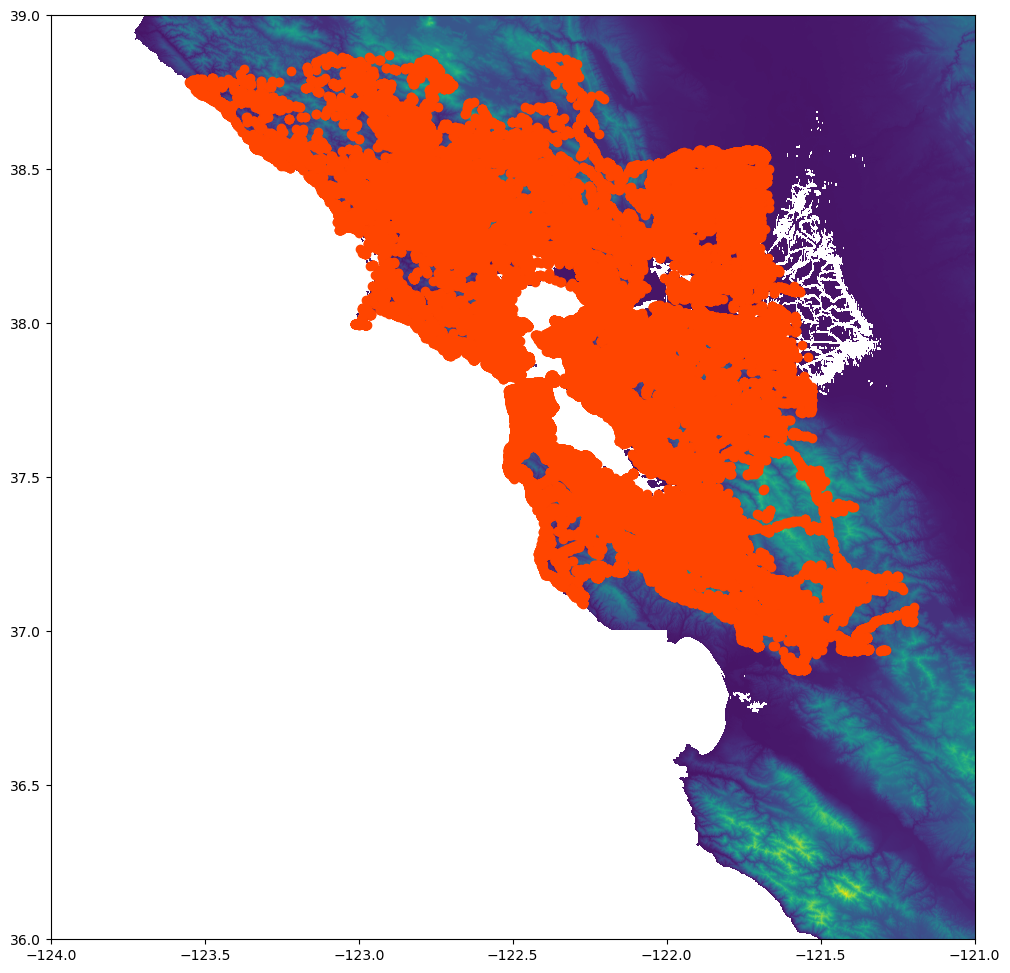

In [13]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
lts_new.boundary.plot(ax=ax, color='orangered')
show(barea_slope, ax=ax)

In [14]:
# Calculate each link starting lat and long
sf1=lts_new.loc[:,["ROAD_ID","starting point"]]
sf1.columns=["ROAD_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["ROAD_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

ROAD_ID                                        geometry   start_lon  \
0   111276  POINT (-121.95749310000001 37.523941700000016) -121.957493   
1   162454                 POINT (-121.7691832 37.3146411) -121.769183   
2   165633  POINT (-121.92277360000001 37.323369199999995) -121.922774   
3   888344   POINT (-122.24641819999998 37.78016040000001) -122.246418   
4   923150          POINT (-122.5192523 38.05433039999999) -122.519252   

   start_lat  
0  37.523942  
1  37.314641  
2  37.323369  
3  37.780160  
4  38.054330

In [15]:
# Calculate each link starting elevation
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = barea_slope.index(x,y)
sf2["starting_ele"]=barea_slope.read(1)[row,col]

In [16]:
sf2.head()

ROAD_ID                                        geometry   start_lon  \
0   111276  POINT (-121.95749310000001 37.523941700000016) -121.957493   
1   162454                 POINT (-121.7691832 37.3146411) -121.769183   
2   165633  POINT (-121.92277360000001 37.323369199999995) -121.922774   
3   888344   POINT (-122.24641819999998 37.78016040000001) -122.246418   
4   923150          POINT (-122.5192523 38.05433039999999) -122.519252   

   start_lat  starting_ele  
0  37.523942            13  
1  37.314641           110  
2  37.323369            36  
3  37.780160             5  
4  38.054330            11

In [17]:
%%time
# Calculate each link end point elevation
ef1=lts_new.loc[:,["ROAD_ID","ending point"]]
ef1.columns=["ROAD_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["ROAD_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

CPU times: total: 9.72 s
Wall time: 9.72 s


ROAD_ID                                geometry     end_lon    end_lat
0   111276  POINT (-121.9572184 37.52396300000001) -121.957218  37.523963
1   162454  POINT (-121.76834140000001 37.3147661) -121.768341  37.314766
2   165633         POINT (-121.9223468 37.3233632) -121.922347  37.323363
3   888344  POINT (-122.2464029 37.78016710000001) -122.246403  37.780167
4   923150  POINT (-122.51929420000002 38.0543339) -122.519294  38.054334

In [18]:
%%time
# Calculate the each link end elevation
ef2["ending_ele"]= None
#point in test['geometry']:
x = ef2["end_lon"]
y = ef2["end_lat"]
row, col = barea_slope.index(x,y)
ef2["ending_ele"]=barea_slope.read(1)[row,col]

CPU times: total: 4.05 s
Wall time: 4.04 s


In [19]:
lts_new.shape,sf2.shape,ef2.shape

((505029, 29), (505029, 5), (505029, 5))

In [20]:
%%time
# Calculate the slope for each link
from functools import reduce
barea_all=[sf2,ef2,lts_new]

barea_all1= reduce(lambda  left,right: pd.merge(left,right,on=['ROAD_ID'],
                                            how='outer'), barea_all).fillna('0')
barea_all1["slope"]=abs((barea_all1['starting_ele']-barea_all1['ending_ele'])/barea_all1['length'])*100
barea_all1=barea_all1.drop_duplicates(subset=['ROAD_ID'], keep='first')
barea_all1.head()

CPU times: total: 4.11 s
Wall time: 4.1 s


ROAD_ID                                      geometry_x   start_lon  \
0   111276  POINT (-121.95749310000001 37.523941700000016) -121.957493   
1   162454                 POINT (-121.7691832 37.3146411) -121.769183   
2   165633  POINT (-121.92277360000001 37.323369199999995) -121.922774   
3   888344   POINT (-122.24641819999998 37.78016040000001) -122.246418   
4   923150          POINT (-122.5192523 38.05433039999999) -122.519252   

   start_lat  starting_ele                              geometry_y  \
0  37.523942            13  POINT (-121.9572184 37.52396300000001)   
1  37.314641           110  POINT (-121.76834140000001 37.3147661)   
2  37.323369            36         POINT (-121.9223468 37.3233632)   
3  37.780160             5  POINT (-122.2464029 37.78016710000001)   
4  38.054330            11  POINT (-122.51929420000002 38.0543339)   

      end_lon    end_lat  ending_ele        osmid  ... FT_SEG_STR FT_INT_STR  \
0 -121.957218  37.523963          13   {31439803}  ...        4.0          0   
1 -121.768341  37.314766         113   {93291777}  ...        4.0        1.0   
2 -121.922347  37.323363          36  {184388728}  ...        4.0        1.0   
3 -122.246403  37.780167           5   {53726448}  ...        4.0        1.0   
4 -122.519294  38.054334          11  {655711604}  ...        1.0          0   

  TF_SEG_STR  TF_INT_STR  XWALK  \
0          0         3.0      0   
1          0         1.0      0   
2          0         1.0      0   
3          0         1.0      0   
4          0           0      0   

                                            geometry     length  \
0  LINESTRING (-121.95749 37.52394, -121.95722 37...  24.398252   
1  LINESTRING (-121.76918 37.31464, -121.76834 37...  75.902661   
2  LINESTRING (-121.92277 37.32337, -121.92235 37...  37.835842   
3  LINESTRING (-122.24642 37.78016, -122.24640 37...   1.539394   
4  LINESTRING (-122.51925 38.05433, -122.51929 38...   3.697954   

                                   starting point  \
0  POINT (-121.95749310000001 37.523941700000016)   
1                 POINT (-121.7691832 37.3146411)   
2  POINT (-121.92277360000001 37.323369199999995)   
3   POINT (-122.24641819999998 37.78016040000001)   
4          POINT (-122.5192523 38.05433039999999)   

                             ending point     slope  
0  POINT (-121.9572184 37.52396300000001)  0.000000  
1  POINT (-121.76834140000001 37.3147661)  3.952431  
2         POINT (-121.9223468 37.3233632)  0.000000  
3  POINT (-122.2464029 37.78016710000001)  0.000000  
4  POINT (-122.51929420000002 38.0543339)  0.000000  

[5 rows x 38 columns]

In [21]:
barea_all1.shape

(505029, 38)

In [22]:
barea_all1['slope'].describe()

count    5.050290e+05
mean     1.737539e+06
std      1.662065e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.423149e+00
max      4.825674e+10
Name: slope, dtype: float64

<AxesSubplot:>

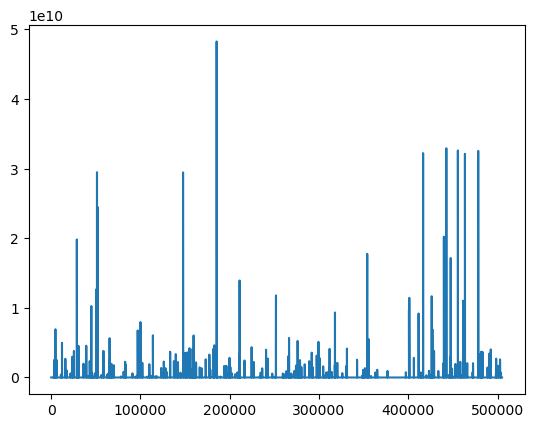

In [23]:
barea_all1.slope.plot()

In [24]:
# It seems that some of the slope is abnormal, due to mountain effect.

In [25]:
# Lets see the number of links that have slope greater than 100%
abnormal_slope=barea_all1.loc[barea_all1['slope']>100]
abnormal_slope.shape

(236, 38)

# Apply the slope effects for the LTS

In [26]:
abnormal_slope.columns

Index(['ROAD_ID', 'geometry_x', 'start_lon', 'start_lat', 'starting_ele',
       'geometry_y', 'end_lon', 'end_lat', 'ending_ele', 'osmid', 'FUNCTIONAL',
       'PATH_ID', 'ONE_WAY', 'u', 'v', 'WIDTH', 'SPEED_LIMI', 'FT_BIKE_IN',
       'FT_BIKE_01', 'TF_BIKE_IN', 'TF_BIKE_01', 'FT_LANES', 'TF_LANES',
       'FT_CROSS_L', 'TF_CROSS_L', 'TWLTL_CROS', 'FT_PARK', 'TF_PARK',
       'FT_SEG_STR', 'FT_INT_STR', 'TF_SEG_STR', 'TF_INT_STR', 'XWALK',
       'geometry', 'length', 'starting point', 'ending point', 'slope'],
      dtype='object')

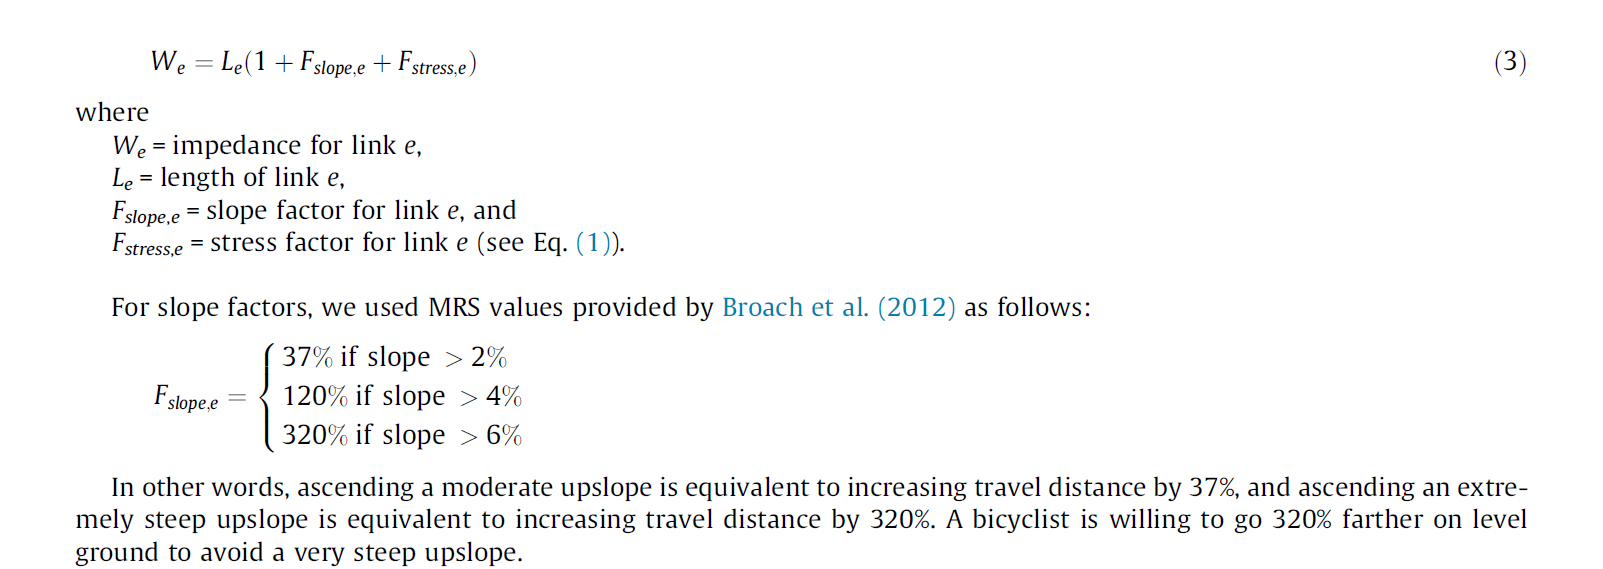

In [27]:
# write a slope impedance function
def slope_correction(length,FT_SEG_STR,slope):
    if slope <=2:
        return length*(1+FT_SEG_STR)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+FT_SEG_STR)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+FT_SEG_STR)
    else:
        return length*(1+3.20+FT_SEG_STR)

In [28]:
#barea_all1['FT_SEG_STR'].astype(str).astype(int)
barea_all1['FT_SEG_STR']=pd.to_numeric(barea_all1['FT_SEG_STR']).astype(int)
barea_all1['FT_SEG_STR'].dtypes

dtype('int32')

In [29]:
barea_all1['impedance_of_link']=barea_all1.apply(lambda row: slope_correction(row['length'],row['FT_SEG_STR'],row['slope']),axis=1)
barea_all1.head(8)

ROAD_ID                                      geometry_x   start_lon  \
0   111276  POINT (-121.95749310000001 37.523941700000016) -121.957493   
1   162454                 POINT (-121.7691832 37.3146411) -121.769183   
2   165633  POINT (-121.92277360000001 37.323369199999995) -121.922774   
3   888344   POINT (-122.24641819999998 37.78016040000001) -122.246418   
4   923150          POINT (-122.5192523 38.05433039999999) -122.519252   
5   955824          POINT (-122.56019300000001 38.0143783) -122.560193   
6   463165         POINT (-121.9533115 37.769879400000015) -121.953311   
7   513383          POINT (-122.05951709999998 37.9342374) -122.059517   

   start_lat  starting_ele                              geometry_y  \
0  37.523942            13  POINT (-121.9572184 37.52396300000001)   
1  37.314641           110  POINT (-121.76834140000001 37.3147661)   
2  37.323369            36         POINT (-121.9223468 37.3233632)   
3  37.780160             5  POINT (-122.2464029 37.78016710000001)   
4  38.054330            11  POINT (-122.51929420000002 38.0543339)   
5  38.014378            17  POINT (-122.5598121 38.01426140000001)   
6  37.769879           144  POINT (-121.9527144 37.76923669999999)   
7  37.934237            22    POINT (-122.05967000000001 37.93478)   

      end_lon    end_lat  ending_ele        osmid  ... FT_INT_STR TF_SEG_STR  \
0 -121.957218  37.523963          13   {31439803}  ...          0          0   
1 -121.768341  37.314766         113   {93291777}  ...        1.0          0   
2 -121.922347  37.323363          36  {184388728}  ...        1.0          0   
3 -122.246403  37.780167           5   {53726448}  ...        1.0          0   
4 -122.519294  38.054334          11  {655711604}  ...          0          0   
5 -122.559812  38.014261          17  {502817925}  ...        1.0          0   
6 -121.952714  37.769237         145  {758004215}  ...        1.0          0   
7 -122.059670  37.934780          22  {792316869}  ...          0          0   

  TF_INT_STR  XWALK                                           geometry  \
0        3.0      0  LINESTRING (-121.95749 37.52394, -121.95722 37...   
1        1.0      0  LINESTRING (-121.76918 37.31464, -121.76834 37...   
2        1.0      0  LINESTRING (-121.92277 37.32337, -121.92235 37...   
3        1.0      0  LINESTRING (-122.24642 37.78016, -122.24640 37...   
4          0      0  LINESTRING (-122.51925 38.05433, -122.51929 38...   
5        1.0      0  LINESTRING (-122.56019 38.01438, -122.55981 38...   
6        1.0      0  LINESTRING (-121.95331 37.76988, -121.95271 37...   
7          0      0  LINESTRING (-122.05952 37.93424, -122.05967 37...   

      length                                  starting point  \
0  24.398252  POINT (-121.95749310000001 37.523941700000016)   
1  75.902661                 POINT (-121.7691832 37.3146411)   
2  37.835842  POINT (-121.92277360000001 37.323369199999995)   
3   1.539394   POINT (-122.24641819999998 37.78016040000001)   
4   3.697954          POINT (-122.5192523 38.05433039999999)   
5  35.877744          POINT (-122.56019300000001 38.0143783)   
6  88.638366         POINT (-121.9533115 37.769879400000015)   
7  61.709085          POINT (-122.05951709999998 37.9342374)   

                             ending point     slope impedance_of_link  
0  POINT (-121.9572184 37.52396300000001)  0.000000        121.991261  
1  POINT (-121.76834140000001 37.3147661)  3.952431        407.597287  
2         POINT (-121.9223468 37.3233632)  0.000000        189.179208  
3  POINT (-122.2464029 37.78016710000001)  0.000000          7.696969  
4  POINT (-122.51929420000002 38.0543339)  0.000000          7.395908  
5  POINT (-122.5598121 38.01426140000001)  0.000000        179.388721  
6  POINT (-121.9527144 37.76923669999999)  1.128180        177.276732  
7    POINT (-122.05967000000001 37.93478)  0.000000        308.545424  

[8 rows x 39 columns]

# Lets Calculate the Connectivity for Alameda County

In [30]:
# Bring US Census track
census_track=gpd.read_file('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Bay_Area_Census_tracts.shp')
census_track.head()

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID  NAME  \
0  G0600010400100      06      001  400100  06001400100  4001   
1  G0600010400200      06      001  400200  06001400200  4002   
2  G0600010400300      06      001  400300  06001400300  4003   
3  G0600010400400      06      001  400400  06001400400  4004   
4  G0600010400500      06      001  400500  06001400500  4005   

            NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 4001  G5020        S  6945857.0     0.0  +37.8676563   
1  Census Tract 4002  G5020        S   586560.0     0.0  +37.8481378   
2  Census Tract 4003  G5020        S  1110840.0     0.0  +37.8405841   
3  Census Tract 4004  G5020        S   716138.0     0.0  +37.8482840   
4  Census Tract 4005  G5020        S   591424.0     0.0  +37.8485452   

       INTPTLON    Shape_Leng    Shape_Le_1    Shape_Area  \
0  -122.2318813  14242.773440  14242.773440  6.945853e+06   
1  -122.2495916   3990.700032   3990.700032  5.865583e+05   
2  -122.2544782   5311.191050   5311.191050  1.110836e+06   
3  -122.2574447   3812.082499   3812.082499  7.161367e+05   
4  -122.2647353   3292.829056   3292.829056  5.914232e+05   

                                            geometry  
0  POLYGON ((-2255573.793 353162.591, -2255577.88...  
1  POLYGON ((-2258184.246 353217.527, -2258186.81...  
2  POLYGON ((-2259381.804 351835.858, -2259385.23...  
3  POLYGON ((-2259084.126 353696.375, -2259085.36...  
4  POLYGON ((-2259833.634 353763.276, -2259822.21...

<AxesSubplot:>

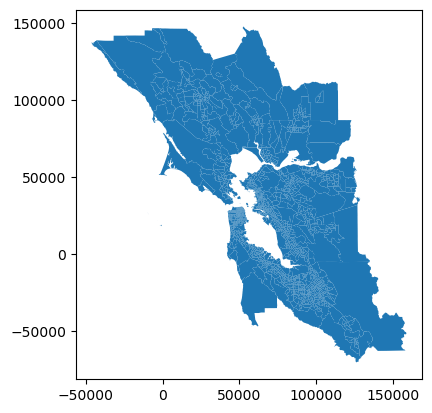

In [31]:
census_track1=census_track.to_crs(epsg=7131)
census_track1.plot()

In [32]:
# read the alamedo boundary shape file
study_bd=gpd.read_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp")
study_bd

county fipsstco  objectid  \
0        Alameda    06001       1.0   
1   Contra Costa    06013       2.0   
2          Marin    06041       3.0   
3           Napa    06055       4.0   
4  San Francisco    06075       5.0   
5      San Mateo    06081       6.0   
6    Santa Clara    06085       7.0   
7         Solano    06095       8.0   
8         Sonoma    06097       9.0   

                                            geometry  
0  MULTIPOLYGON (((-122.21496 37.76113, -122.2156...  
1  MULTIPOLYGON (((-121.95091 38.05392, -121.9505...  
2  MULTIPOLYGON (((-122.86959 38.02140, -122.8711...  
3  POLYGON ((-122.20246 38.68898, -122.20232 38.6...  
4  MULTIPOLYGON (((-122.47738 37.81103, -122.4763...  
5  MULTIPOLYGON (((-122.50248 37.70813, -122.4977...  
6  MULTIPOLYGON (((-122.02427 37.46094, -122.0203...  
7  MULTIPOLYGON (((-122.01053 38.09290, -122.0110...  
8  MULTIPOLYGON (((-123.53354 38.76841, -123.5333...

In [33]:
# lets consider only Alameda for now
sf_bd=study_bd.loc[study_bd['county']=='Alameda']
sf_bd1=gpd.GeoDataFrame.explode(sf_bd)
sf_bd1

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\1682995954.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_bd1=gpd.GeoDataFrame.explode(sf_bd)


county fipsstco  objectid  \
0 0  Alameda    06001       1.0   
  1  Alameda    06001       1.0   
  2  Alameda    06001       1.0   
  3  Alameda    06001       1.0   
  4  Alameda    06001       1.0   

                                              geometry  
0 0  POLYGON ((-122.21496 37.76113, -122.21568 37.7...  
  1  POLYGON ((-122.23618 37.74913, -122.23658 37.7...  
  2  POLYGON ((-122.24598 37.77893, -122.24778 37.7...  
  3  POLYGON ((-122.08417 37.50584, -122.08207 37.5...  
  4  POLYGON ((-122.28758 37.76483, -122.28898 37.7...

In [34]:
sf_bd1.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

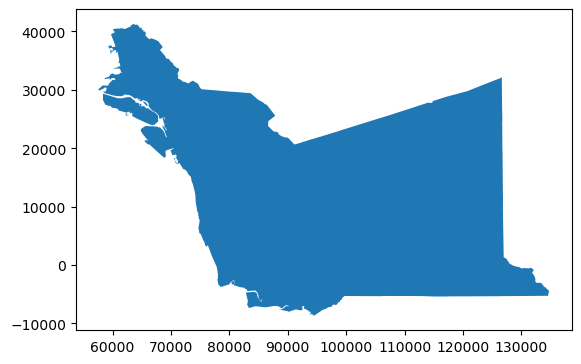

In [35]:
sf_bd_proj = sf_bd.to_crs(epsg=7131)
sf_bd_proj.plot()

In [36]:
sf_bd_proj

county fipsstco  objectid  \
0  Alameda    06001       1.0   

                                            geometry  
0  MULTIPOLYGON (((68710.996 25261.251, 68647.672...

In [37]:
sf_bd_proj['area']=sf_bd_proj['geometry'].area*3.861e-7 # mile square
sf_bd_proj

county fipsstco  objectid  \
0  Alameda    06001       1.0   

                                            geometry        area  
0  MULTIPOLYGON (((68710.996 25261.251, 68647.672...  744.319461

In [38]:
sf_area=sf_bd_proj[['area']].values
sf_area

array([[744.31946096]])

In [39]:
# Convert to geodataframe
#abnormal_slope1=abnormal_slope.set_crs(epsg=4326)
#abnormal_slope2=abnormal_slope1.to_crs(epsg=7131)
barea_all2 = gpd.GeoDataFrame(barea_all1, crs="EPSG:4326", geometry='geometry')
barea_all3=barea_all2.to_crs(epsg=7131)
barea_all3.head()

ROAD_ID                                      geometry_x   start_lon  \
0   111276  POINT (-121.95749310000001 37.523941700000016) -121.957493   
1   162454                 POINT (-121.7691832 37.3146411) -121.769183   
2   165633  POINT (-121.92277360000001 37.323369199999995) -121.922774   
3   888344   POINT (-122.24641819999998 37.78016040000001) -122.246418   
4   923150          POINT (-122.5192523 38.05433039999999) -122.519252   

   start_lat  starting_ele                              geometry_y  \
0  37.523942            13  POINT (-121.9572184 37.52396300000001)   
1  37.314641           110  POINT (-121.76834140000001 37.3147661)   
2  37.323369            36         POINT (-121.9223468 37.3233632)   
3  37.780160             5  POINT (-122.2464029 37.78016710000001)   
4  38.054330            11  POINT (-122.51929420000002 38.0543339)   

      end_lon    end_lat  ending_ele        osmid  ... FT_INT_STR TF_SEG_STR  \
0 -121.957218  37.523963          13   {31439803}  ...          0          0   
1 -121.768341  37.314766         113   {93291777}  ...        1.0          0   
2 -121.922347  37.323363          36  {184388728}  ...        1.0          0   
3 -122.246403  37.780167           5   {53726448}  ...        1.0          0   
4 -122.519294  38.054334          11  {655711604}  ...          0          0   

  TF_INT_STR  XWALK                                           geometry  \
0        3.0      0  LINESTRING (91536.677 -976.326, 91560.948 -973...   
1        1.0      0  LINESTRING (108350.827 -24102.437, 108425.349 ...   
2        1.0      0  LINESTRING (94730.324 -23220.754, 94768.157 -2...   
3        1.0      0  LINESTRING (65934.473 27367.107, 65935.819 273...   
4          0      0  LINESTRING (41921.847 57781.540, 41918.170 577...   

      length                                  starting point  \
0  24.398252  POINT (-121.95749310000001 37.523941700000016)   
1  75.902661                 POINT (-121.7691832 37.3146411)   
2  37.835842  POINT (-121.92277360000001 37.323369199999995)   
3   1.539394   POINT (-122.24641819999998 37.78016040000001)   
4   3.697954          POINT (-122.5192523 38.05433039999999)   

                             ending point     slope impedance_of_link  
0  POINT (-121.9572184 37.52396300000001)  0.000000        121.991261  
1  POINT (-121.76834140000001 37.3147661)  3.952431        407.597287  
2         POINT (-121.9223468 37.3233632)  0.000000        189.179208  
3  POINT (-122.2464029 37.78016710000001)  0.000000          7.696969  
4  POINT (-122.51929420000002 38.0543339)  0.000000          7.395908  

[5 rows x 39 columns]

In [40]:
# Now lets crop the alameda area of lTS network
sf_lts=gpd.clip(barea_all3,sf_bd_proj)
sf_lts.head()

ROAD_ID                              geometry_x   start_lon  \
48143    183293         POINT (-121.9305386 37.4640644) -121.930539   
483866   262192          POINT (-121.933012 37.4661099) -121.933012   
470670   262198  POINT (-121.93361640000002 37.4664779) -121.933616   
490470   262120  POINT (-121.93000420000001 37.4635428) -121.930004   
408906   183231         POINT (-121.9303814 37.4642089) -121.930381   

        start_lat  starting_ele                       geometry_y     end_lon  \
48143   37.464064             4  POINT (-121.9375408 37.4624366) -121.937541   
483866  37.466110             3  POINT (-121.9328166 37.4659909) -121.932817   
470670  37.466478             3   POINT (-121.933012 37.4661099) -121.933012   
490470  37.463543             6  POINT (-121.9303814 37.4642089) -121.930381   
408906  37.464209             5   POINT (-121.9304091 37.464257) -121.930409   

          end_lat  ending_ele                            osmid  ...  \
48143   37.462437           4            {670631242,400361916}  ...   
483866  37.465991           3                      {116909076}  ...   
470670  37.466110           3                      {116909076}  ...   
490470  37.464209           5  {341918938,482094388,116909076}  ...   
408906  37.464257           5                      {116909076}  ...   

       FT_INT_STR TF_SEG_STR TF_INT_STR  XWALK  \
48143         1.0        1.0          0      0   
483866          0        4.0          0      0   
470670          0        4.0          0      0   
490470          0        4.0          0      0   
408906          0        4.0          0      0   

                                                 geometry      length  \
48143   LINESTRING (93956.096 -7609.225, 93946.114 -76...  664.427482   
483866  LINESTRING (93736.030 -7383.402, 93753.389 -73...   21.754930   
470670  LINESTRING (93682.336 -7342.852, 93736.030 -73...   67.285298   
490470  LINESTRING (94003.693 -7666.855, 93998.959 -76...   81.168929   
408906  LINESTRING (93969.915 -7593.110, 93967.435 -75...    5.874221   

                                starting point  \
48143          POINT (-121.9305386 37.4640644)   
483866          POINT (-121.933012 37.4661099)   
470670  POINT (-121.93361640000002 37.4664779)   
490470  POINT (-121.93000420000001 37.4635428)   
408906         POINT (-121.9303814 37.4642089)   

                           ending point     slope impedance_of_link  
48143   POINT (-121.9375408 37.4624366)  0.000000       1328.854963  
483866  POINT (-121.9328166 37.4659909)  0.000000        108.774648  
470670   POINT (-121.933012 37.4661099)  0.000000        336.426489  
490470  POINT (-121.9303814 37.4642089)  1.231999        405.844647  
408906   POINT (-121.9304091 37.464257)  0.000000         29.371105  

[5 rows x 39 columns]

In [41]:
sf_lts.groupby(['FT_BIKE_IN']).count()

ROAD_ID  geometry_x  start_lon  start_lat  starting_ele  \
FT_BIKE_IN                                                               
0                70850       70850      70850      70850         70850   
buffered_lane        4           4          4          4             4   
lane             13307       13307      13307      13307         13307   
path              4560        4560       4560       4560          4560   
sharrow           3862        3862       3862       3862          3862   
track              332         332        332        332           332   

               geometry_y  end_lon  end_lat  ending_ele  osmid  ...  \
FT_BIKE_IN                                                      ...   
0                   70850    70850    70850       70850  70850  ...   
buffered_lane           4        4        4           4      4  ...   
lane                13307    13307    13307       13307  13307  ...   
path                 4560     4560     4560        4560   4560  ...   
sharrow              3862     3862     3862        3862   3862  ...   
track                 332      332      332         332    332  ...   

               FT_INT_STR  TF_SEG_STR  TF_INT_STR  XWALK  geometry  length  \
FT_BIKE_IN                                                                   
0                   70850       70850       70850  70850     70850   70850   
buffered_lane           4           4           4      4         4       4   
lane                13307       13307       13307  13307     13307   13307   
path                 4560        4560        4560   4560      4560    4560   
sharrow              3862        3862        3862   3862      3862    3862   
track                 332         332         332    332       332     332   

               starting point  ending point  slope  impedance_of_link  
FT_BIKE_IN                                                             
0                       70850         70850  70850              70850  
buffered_lane               4             4      4                  4  
lane                    13307         13307  13307              13307  
path                     4560          4560   4560               4560  
sharrow                  3862          3862   3862               3862  
track                     332           332    332                332  

[6 rows x 38 columns]

In [42]:
sf_lts.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
lts.shape

(505029, 27)

In [44]:
# Convert the LTS shape file to graph to run the 
sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)
sf_lts_g1 =momepy.gdf_to_nx(sf_lts_g, approach='primal')

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\1286791951.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)


In [45]:
#  f, ax = plt.subplots(1, 3, figsize=(18, 10), sharex=True, sharey=True)
#  sf_lts.plot(color='#e32e00', ax=ax[0])
#  for i, facet in enumerate(ax):
#      facet.set_title(("Streets", "Primal graph", "Overlay")[i])
#      facet.axis("off")
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[1], node_size=0.01)
# # sf_lts.plot(color='#e32e00', ax=ax[2], zorder=-1)
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[2], node_size=0.01)

# Calculate Simple Graph Theories Connectivity for SF

<AxesSubplot:>

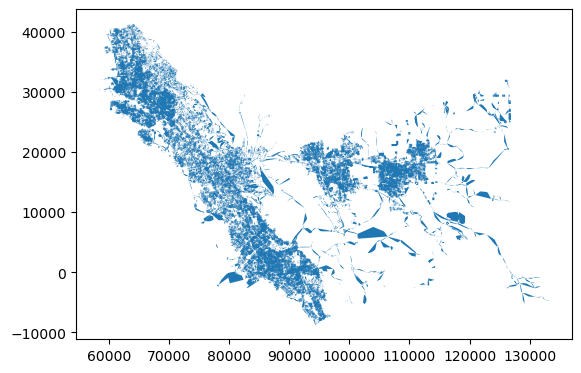

In [46]:
sf_lts['geometry'].convex_hull.plot()

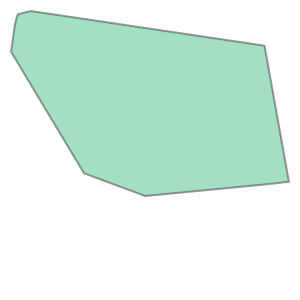

In [47]:
# Get the Convex Hull of the network
convex_hull_area = sf_lts.unary_union.convex_hull
# Show output
convex_hull_area

<AxesSubplot:>

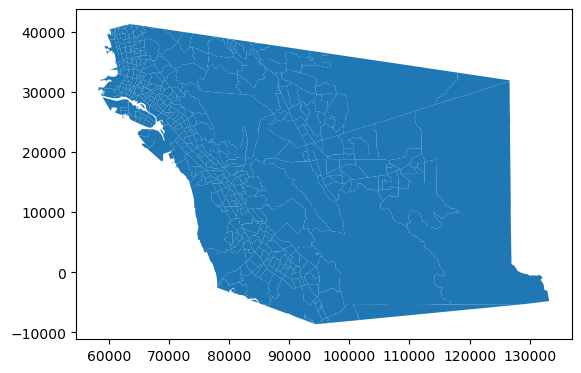

In [48]:
census_track2_sf=gpd.clip(census_track1,convex_hull_area)
census_track2_sf.plot()

In [49]:
convex_hull_area1=convex_hull_area.area
convex_hull_area1

2686131922.7985315

In [50]:
# Calculate the number of Intersections
crossroad_nodes = [node for node in sf_lts_g1.nodes() if len(sf_lts_g1.edges(node)) > 2]


In [51]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

#print("Number of elements in the list: ", get_number_of_elements(list_c))

In [52]:
# Number of intersections where edge>2
NI=get_number_of_elements(crossroad_nodes)
NI

34069

# Calculate the Connectivity of the Network: using Formula "Shortest Path in bicycle facilities /Shortest Path in motor ways

In [53]:
sf_lts['FT_BIKE_IN'].dtypes

dtype('O')

<AxesSubplot:>

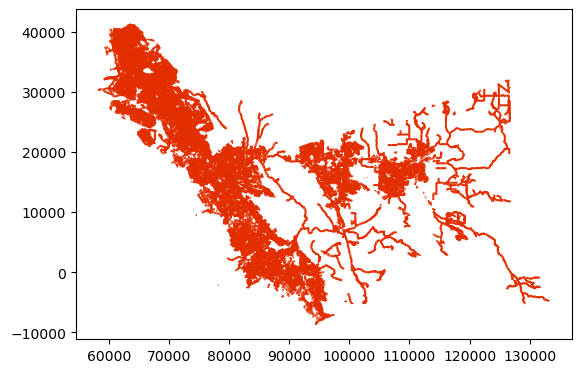

In [54]:
# Get the motorway network and bike network based on functional class of the roads
#sf_motor_network=sf_lts[sf_lts['BIKE_LANE_'].isna()]
sf_motor_network=sf_lts.loc[sf_lts['FT_BIKE_IN']=='0']
# Plot the motor Network
sf_motor_network.plot(color='#e32e00')

<AxesSubplot:>

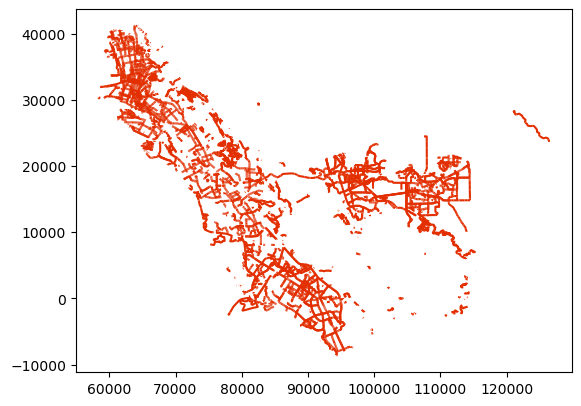

In [55]:
# Plot the Bike Network
sf_bike_network=sf_lts.loc[sf_lts['FT_BIKE_IN']!='0']
sf_bike_network.plot(color='#e32e00')

In [128]:
sf_lts.shape, sf_bike_network.shape, sf_motor_network.shape

((92915, 39), (22065, 39), (70850, 39))

In [129]:
sf_bike_network.tail()

ROAD_ID                              geometry_x   start_lon  \
182899   931871  POINT (-122.219546 37.851682600000004) -122.219546   
172603  1005916  POINT (-122.219546 37.851682600000004) -122.219546   
346348  1005914         POINT (-122.2195941 37.8516631) -122.219594   
268517   931872  POINT (-122.21962419999998 37.8517223) -122.219624   
226510   791695  POINT (-122.21395750000002 37.8555898) -122.213958   

        start_lat  starting_ele  \
182899  37.851683           287   
172603  37.851683           287   
346348  37.851663           287   
268517  37.851722           287   
226510  37.855590           322   

                                           geometry_y     end_lon    end_lat  \
182899           POINT (-122.21944800000001 37.85172) -122.219448  37.851720   
172603                POINT (-122.2195941 37.8516631) -122.219594  37.851663   
346348         POINT (-122.21962419999998 37.8517223) -122.219624  37.851722   
268517           POINT (-122.21944800000001 37.85172) -122.219448  37.851720   
226510  POINT (-122.22055609999998 37.85328650000001) -122.220556  37.853287   

        ending_ele                         osmid  ... FT_INT_STR TF_SEG_STR  \
182899         290                   {859898290}  ...          0        1.0   
172603         287                   {859898290}  ...        1.0        1.0   
346348         287                   {859898290}  ...        1.0        1.0   
268517         290                   {859898290}  ...          0        1.0   
226510         208  {49249961,49249962,23875268}  ...          0        1.0   

       TF_INT_STR  XWALK                                           geometry  \
182899        1.0      0  LINESTRING (68282.196 35311.136, 68283.398 353...   
172603        1.0      0  LINESTRING (68282.196 35311.136, 68280.451 353...   
346348        1.0      0  LINESTRING (68277.968 35308.961, 68277.106 353...   
268517        1.0      0  LINESTRING (68275.303 35315.525, 68275.804 353...   
226510        1.0      0  LINESTRING (68772.943 35746.043, 68771.209 357...   

            length                          starting point  \
182899   56.818154  POINT (-122.219546 37.851682600000004)   
172603    5.432162  POINT (-122.219546 37.851682600000004)   
346348    7.146914         POINT (-122.2195941 37.8516631)   
268517   60.556917  POINT (-122.21962419999998 37.8517223)   
226510  825.840456  POINT (-122.21395750000002 37.8555898)   

                                         ending point      slope  \
182899           POINT (-122.21944800000001 37.85172)   5.280003   
172603                POINT (-122.2195941 37.8516631)   0.000000   
346348         POINT (-122.21962419999998 37.8517223)   0.000000   
268517           POINT (-122.21944800000001 37.85172)   4.954017   
226510  POINT (-122.22055609999998 37.85328650000001)  13.804119   

       impedance_of_link  
182899        181.818092  
172603         10.864324  
346348         14.293828  
268517        193.782135  
226510       4294.370370  

[5 rows x 39 columns]

In [56]:
def sf_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=None, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # Calculate the total motor path
    sf_shortest_path_motor_length['total']=sf_shortest_path_motor_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_motor_length_sum=sf_shortest_path_motor_length['total'].sum()


    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=None, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # Calculate the total motor path
    sf_shortest_path_bike_length['total']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length_sum=sf_shortest_path_bike_length['total'].sum()

    #connectivity score
    sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
    connectivity_score.append((sf_shortest_path_motor_length_sum,sf_shortest_path_bike_length_sum, sf_network_connectivity_score))

    cols=['motor_path_weighted_length','bike_path_weighted_length','Connectivity score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result


In [57]:
def graph_parameter(sf_motor_network,cul_de_sacs,convex_hull_area1,sf_area):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    # Calculate the number of Intersections
    crossroad_nodes = [node for node in sf_lts_motor_g1.nodes() if len(sf_lts_motor_g1.edges(node)) > 2]
    # Number of intersections where edge>2
    NI=get_number_of_elements(crossroad_nodes)
    # Calculate the parameters that we need
    edge_length_total1=sf_lts_motor_g.geometry.length.sum()
    street_segment_count1=sf_lts_motor_g1.number_of_edges()
    n1=sf_lts_motor_g1.number_of_nodes()
    sn=nx.number_connected_components(sf_lts_motor_g1)
#    cul_de_sacs=1102 # used cul-de-scas function from ArcGIS Pro
    
    Street_density=(edge_length_total1*0.000621371)/(convex_hull_area1*3.861e-7) # mile/square mile
    Intersection_density=(NI/convex_hull_area1*3.861e-7) # per mile square
    Street_density_by_land_area=(edge_length_total1*0.000621371)/(sf_area) # mile/square mile
    Intersection_density_by_land_area=(NI/sf_area) # per mile square
    CNR=(NI/(NI+cul_de_sacs))
    alpha=(street_segment_count1-n1+sn)/(2*n1-5)
    beta=street_segment_count1/n1
    gamma=street_segment_count1/(3*n1-2)
    eta=edge_length_total1/street_segment_count1
    GTP=(street_segment_count1-n1+sn)/((math.sqrt(n1)-1)**2)
    Cyclomatic_Number=street_segment_count1-n1+1
    Aggregate_TP_score=alpha+beta+gamma+Cyclomatic_Number
    
    connectivity_score.append((NI,street_segment_count1,n1,sn,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,Cyclomatic_Number,Aggregate_TP_score))
    cols=['Number of Intersection','street_segment_count','Number of Node','Number of subnetwork','Street_density','Intersection_density','Street_density_by_land_area','Intersection_density_by_land_area','CNR','alpha','beta','gamma','eta','GTP','cyclomatic_Number','Aggregate_TP_score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result

In [60]:
# Calculate the graph parameter for motor network for SF
motor_network_score=graph_parameter(sf_motor_network,12818,convex_hull_area1,sf_area)
motor_network_score['mode']='motor'
motor_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_12892\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


Number of Intersection  street_segment_count  Number of Node  \
0                   23655                 70878           62850   

   Number of subnetwork  Street_density  Intersection_density  \
0                  1461        3.774362          3.400129e-12   

  Street_density_by_land_area Intersection_density_by_land_area       CNR  \
0       [[5.259099136899532]]            [[31.780708742231525]]  0.648562   

      alpha      beta     gamma       eta      GTP  cyclomatic_Number  \
0  0.075492  1.127733  0.375915  88.88087  0.15219               8029   

   Aggregate_TP_score   mode  
0          8030.57914  motor

In [61]:
# Calculate the graph parameter for bike network for SF
bike_network_score=graph_parameter(sf_bike_network,2931,convex_hull_area1,sf_area)
bike_network_score['mode']='bike'
bike_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_12892\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


Number of Intersection  street_segment_count  Number of Node  \
0                    2980                 22108           21691   

   Number of subnetwork  Street_density  Intersection_density  \
0                   773        1.204215          4.283401e-13   

  Street_density_by_land_area Intersection_density_by_land_area       CNR  \
0      [[1.6779223783090902]]             [[4.003657241676176]]  0.504145   

      alpha      beta     gamma        eta       GTP  cyclomatic_Number  \
0  0.027434  1.019225  0.339752  90.914008  0.055614                418   

   Aggregate_TP_score  mode  
0           419.38641  bike

In [72]:
## Calculate the connectivity score for bike vs motor network condition
sf_connectivity_score (sf_motor_network,sf_bike_network)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16808\2561783953.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


MemoryError: 

# Calculate the connectivity score for the census track level of the SF Network

In [ ]:
# # Define grid
# def make_grid(sample_sublink,m,n):
#     xmin,ymin,xmax,ymax = sample_sublink.total_bounds
#     width = (xmax-xmin)/m
#     height = (ymax-ymin)/n
#     rows = int(np.ceil((ymax-ymin) / height))
#     cols = int(np.ceil((xmax-xmin) / width))
#     XleftOrigin = xmin
#     XrightOrigin = xmin + width
#     YtopOrigin = ymax
#     YbottomOrigin = ymax - height
#     polygons = []

#     for i in range(cols):
#         Ytop = YtopOrigin
#         Ybottom =YbottomOrigin
#         for j in range(rows):
#             polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
#             Ytop = Ytop - height
#             Ybottom = Ybottom - height
#         XleftOrigin = XleftOrigin + width
#         XrightOrigin = XrightOrigin + width

#     grid = gpd.GeoDataFrame({'geometry':polygons})
#     grid1=grid.set_crs('EPSG:7131')
#     return grid1

In [ ]:
# Make a bigger grid which will be initial input of for loop
# m=2 # input m value here
# n=2 # input n value here
# grid_sf=make_grid(sf_lts_g,m,n)
# #grid_motor['Block_ID']=grid_motor.index
# grid_sf

<AxesSubplot:>

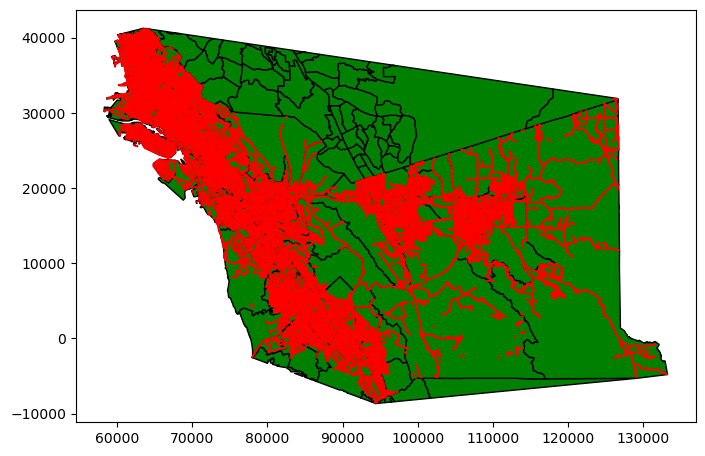

In [132]:
fig, ax = plt.subplots(figsize = (8,8)) 
census_track2_sf.plot(ax=ax,color="green",edgecolor='k')
sf_lts.geometry.plot(color="red",edgecolor='k',ax=ax)

In [63]:
input_census_tract=census_track2_sf.reset_index()
input_census_tract.shape

(450, 18)

In [64]:
def grid_connectivity_score (input_census_tract,sf_motor_network,sf_bike_network):
    
    connectivity_score=[]

    for index, row in input_census_tract.iterrows():
        network_motor=gpd.clip(sf_motor_network,row['geometry'])
        sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
        sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
        #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
        motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=None, weight='impedance_of_link'))
        # Convert the shorsted path distance distionary to dataframe
        sf_shortest_path_motor_length=pd.DataFrame.from_dict(motor_length)
        # Calculate the total motor path
        sf_shortest_path_motor_length['total']=sf_shortest_path_motor_length.sum(numeric_only=True, axis=0)
        sf_shortest_path_motor_length_sum=sf_shortest_path_motor_length['total'].sum()



        network_bike=gpd.clip(sf_bike_network,row['geometry'])
        sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
        sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
        #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
        bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=None, weight='impedance_of_link'))
        # Convert the shorsted path distance distionary to dataframe
        sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
        # Calculate the total motor path
        sf_shortest_path_bike_length['total']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
        sf_shortest_path_bike_length_sum=sf_shortest_path_bike_length['total'].sum()

        #connectivity score
        sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
        connectivity_score.append((sf_shortest_path_motor_length_sum,sf_shortest_path_bike_length_sum, sf_network_connectivity_score))

    cols=['motor_path_weighted_length','bike_path_weighted_length','Connectivity score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result


In [135]:
SF_CS=grid_connectivity_score (input_census_tract,sf_motor_network,sf_bike_network)
SF_CS.head()

motor_path_weighted_length  bike_path_weighted_length  Connectivity score
0                2.220030e+04               0.000000e+00            0.000000
1                1.011830e+04               1.160539e+03            0.114697
2                1.018267e+10               1.151367e+07            0.001131
3                3.116402e+07               1.446593e+05            0.004642
4                1.366116e+07               2.431700e+06            0.178001

In [136]:
# Now jointhe connectivity score with census track and save it

In [137]:
cs_census_track=pd.merge(SF_CS, input_census_tract, left_index=True, right_index=True)
cs_census_track.head()

motor_path_weighted_length  bike_path_weighted_length  Connectivity score  \
0                2.220030e+04               0.000000e+00            0.000000   
1                1.011830e+04               1.160539e+03            0.114697   
2                1.018267e+10               1.151367e+07            0.001131   
3                3.116402e+07               1.446593e+05            0.004642   
4                1.366116e+07               2.431700e+06            0.178001   

   index         GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  ...  \
0   1560  G0600850513500      06      085  513500  06085513500     5135  ...   
1   1310  G0600850504424      06      085  504424  06085504424  5044.24  ...   
2    240  G0600010437101      06      001  437101  06001437101  4371.01  ...   
3    241  G0600010437102      06      001  437102  06001437102  4371.02  ...   
4    243  G0600010437300      06      001  437300  06001437300     4373  ...   

   MTFCC FUNCSTAT         ALAND     AWATER     INTPTLAT      INTPTLON  \
0  G5020        S  1.528908e+09  9778597.0  +37.2480990  -121.5279664   
1  G5020        S  2.545545e+07   119350.0  +37.4524963  -121.8635532   
2  G5020        S  4.926455e+07  7210036.0  +37.6059048  -122.1268730   
3  G5020        S  8.700050e+05        0.0  +37.6298655  -122.1002746   
4  G5020        S  1.027863e+06        0.0  +37.6362157  -122.0929895   

      Shape_Leng     Shape_Le_1    Shape_Area  \
0  263316.839386  263432.929604  1.538575e+09   
1   26989.264347   26989.264347  2.557480e+07   
2   44449.855567   41178.694522  4.867504e+07   
3    4785.540855    4785.540855  8.700047e+05   
4    4573.143057    4573.143057  1.027861e+06   

                                            geometry  
0  POLYGON ((117719.524 -5361.013, 117780.114 -53...  
1  POLYGON ((100557.206 -5297.895, 100555.697 -53...  
2  POLYGON ((74833.449 14678.812, 74871.024 14628...  
3  POLYGON ((79183.223 10829.076, 79194.342 10806...  
4  POLYGON ((79978.156 11415.372, 79991.840 11391...  

[5 rows x 21 columns]

In [138]:
cs_census_track['Connectivity score'].median()

0.060811902709331296

In [360]:
crs = {'init': 'epsg:7131'}
gdf = gpd.GeoDataFrame(cs_census_track, crs=crs, geometry = 'geometry')
gdf.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Alameda_Census_track_level_CS.shp")

# Consider high Stress Vs Low Stress connectivity: using Formula "Shortest Path(LTS1+LTS2)/Shortest Path in motor Network

In [65]:
# Split the network as low network to get the connectivity 
sf_motor_network_op2=sf_motor_network
sf_bike_network_op2=sf_lts.loc[sf_lts['FT_SEG_STR']<3]

In [66]:
# low stress connectivity
low_stress_network_score=graph_parameter(sf_bike_network_op2,15960,convex_hull_area1,sf_area)
low_stress_network_score['mode']='low_stress'
low_stress_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


Number of Intersection  street_segment_count  Number of Node  \
0                   18122                 56065           53340   

   Number of subnetwork  Street_density  Intersection_density  \
0                  3199        3.209365          2.604825e-12   

  Street_density_by_land_area Intersection_density_by_land_area       CNR  \
0       [[4.471846927908014]]            [[24.347072662300558]]  0.531718   

      alpha      beta     gamma        eta       GTP  cyclomatic_Number  \
0  0.055533  1.051087  0.350367  95.544017  0.112029               2726   

   Aggregate_TP_score        mode  
0         2727.456987  low_stress

In [ ]:
# Motor Network connectivity
high_stress_network_score=graph_parameter(sf_motor_network_op2,12818,convex_hull_area1,sf_area)
high_stress_network_score['mode']='motor network'
high_stress_network_score

In [ ]:
# low Stress Vs Motor network connectivity score
## Calculate the connectivity score for bike vs motor network condition
low_high_stress_CS=sf_connectivity_score (sf_motor_network_op2,sf_bike_network_op2)
low_high_stress_CS

In [68]:
# Calculate the census level stress for  low stress Vs Motor Network network
SF_CS_hl=grid_connectivity_score (input_census_tract,sf_bike_network_op2,sf_motor_network_op2)
SF_CS_hl.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarnin

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:31: RuntimeWarning: invalid value encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:31: RuntimeWarning: invalid value encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarnin

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

motor_path_weighted_length  bike_path_weighted_length  Connectivity score
0                0.000000e+00               2.220030e+04                 inf
1                8.368960e+03               1.011830e+04            1.209027
2                8.835523e+07               1.018267e+10          115.246984
3                4.708730e+05               3.116402e+07           66.183483
4                1.569606e+06               1.366116e+07            8.703559

In [69]:
# get the median CS 
SF_CS_hl['Connectivity score'].median()

2.9410417529386272

In [70]:
# Save the census tract level connectivity score
cs_census_track_hl=pd.merge(SF_CS_hl, input_census_tract, left_index=True, right_index=True)
crs = {'init': 'epsg:7131'}
gdf_hl = gpd.GeoDataFrame(cs_census_track_hl, crs=crs, geometry = 'geometry')
gdf_hl.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Alameda_Census_track_level_CS_hl.shp")

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_30704\2246915493.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_hl.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Alameda_Census_track_level_CS_hl.shp")


# end of the Code